In [1]:
import math
import numpy as np

import sympy
### similar to mathematica

from sympy import symbols, Symbol

sympy.init_printing(use_latex=True)

##### Dubins Auv Angle Solution

In [8]:
x, y = symbols('x, y', is_positive=True)
tan_theta = Symbol('tan_theta')

In [9]:
expr1 = sympy.Equality(x**2 + y**2, 1)
expr2 = sympy.Equality(y / (1.0 + x), tan_theta)

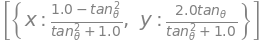

In [10]:
res = sympy.solve([expr1, expr2], [x, y], dict=True)
res

In [6]:
def compute_angel(theta):
    tan_theta_v = math.tan(theta)
    x = (1.0 - tan_theta_v ** 2) / (1.0 + tan_theta_v**2)
    y = 2.0 * tan_theta_v / (1.0 + tan_theta_v**2)
    return x, y

In [11]:
theta = np.deg2rad(-48.5)
x, y = compute_angel(theta)

r = np.rad2deg(math.atan2(y, 1.0 + x))
r

##### Flexiable Gradient Compution

##### Smoothess

In [3]:
x_t0, y_t0, z_t0 = symbols('x_t0, y_t0, z_t0', is_positive=True, is_real=True)
x_t1, y_t1, z_t1 = symbols('x_t1, y_t1, z_t1', is_positive=True, is_real=True)
x_t2, y_t2, z_t2 = symbols('x_t2, y_t2, z_t2', is_positive=True, is_real=True)

In [4]:
f = sympy.Pow(x_t1-x_t0, 2) + sympy.Pow(x_t2-x_t1, 2)
f

In [3]:
loss0 = sympy.Pow(x_t1-x_t0, 2) + sympy.Pow(y_t1-y_t0, 2) + sympy.Pow(z_t1-z_t0, 2)
loss1 = sympy.Pow(x_t2-x_t1, 2) + sympy.Pow(y_t2-y_t1, 2) + sympy.Pow(z_t2-z_t1, 2)
loss = loss0 + loss1

In [7]:
sympy.diff(loss, (x_t1, 1))

In [8]:
sympy.diff(loss, (y_t1, 1))

In [9]:
sympy.diff(loss, (z_t1, 1))

##### Conflict

In [2]:
x_1, y_1, z_1 = symbols('x_1, y_1, z_1', is_positive=True, is_real=True)
x_2, y_2, z_2 = symbols('x_2, y_2, z_2', is_positive=True, is_real=True)
length_max = Symbol('length_max', is_positive=True, is_real=True)

In [3]:
length = sympy.sqrt(sympy.Pow(x_1-x_2, 2) + sympy.Pow(y_1-y_2, 2) + sympy.Pow(z_1-z_2, 2))
loss = sympy.Pow(length - length_max, 2)

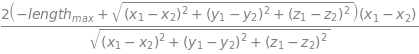

In [4]:
sympy.diff(loss, x_1)

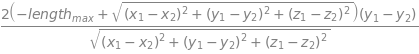

In [5]:
sympy.diff(loss, y_1)

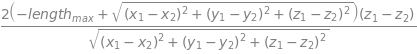

In [6]:
sympy.diff(loss, z_1)

##### Curvature

In [3]:
x_t0, y_t0, z_t0 = symbols('x_t0, y_t0, z_t0', is_positive=True, is_real=True)
x_t1, y_t1, z_t1 = symbols('x_t1, y_t1, z_t1', is_positive=True, is_real=True)
x_t2, y_t2, z_t2 = symbols('x_t2, y_t2, z_t2', is_positive=True, is_real=True)
curvature_max = Symbol('curvature_max', is_positive=True, is_real=True)

In [4]:
vecx_01 = x_t1 - x_t0
vecy_01 = y_t1 - y_t0
vecz_01 = z_t1 - z_t0

vecx_12 = x_t2 - x_t1
vecy_12 = y_t2 - y_t1
vecz_12 = z_t2 - z_t1

length_01 = sympy.sqrt(
    sympy.Pow(vecx_01, 2) + sympy.Pow(vecy_01, 2) + sympy.Pow(vecz_01, 2)
)
length_12 = sympy.sqrt(
    sympy.Pow(vecx_12, 2) + sympy.Pow(vecy_12, 2) + sympy.Pow(vecz_12, 2)
)

cos_theta = (vecx_01 * vecx_12 + vecy_01 * vecy_01 + vecz_01 * vecz_12) / (length_01 * length_12)
theta = sympy.acos(cos_theta)

loss = theta / length_12 - curvature_max

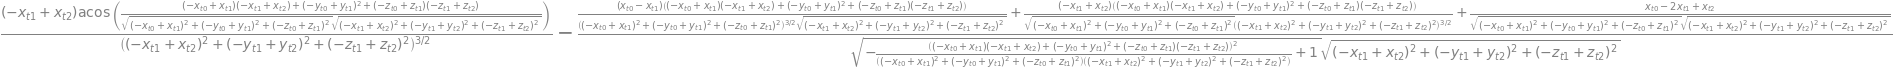

In [7]:
sympy.diff(loss, x_t1)

In [3]:
x_t0, y_t0, z_t0 = symbols('x_t0, y_t0, z_t0', is_positive=True, is_real=True)
x_mid, y_mid, z_mid = symbols('x_mid, y_mid, z_mid', is_positive=True, is_real=True)

In [8]:
vecx = x_mid - x_t0
vecy = y_mid - y_t0
vecz = z_mid - z_t0

loss = sympy.Pow(vecx, 2) + sympy.Pow(vecy, 2) + sympy.Pow(vecz, 2)

In [9]:
sympy.diff(loss, x_t0)

In [10]:
sympy.diff(loss, y_t0)

In [11]:
sympy.diff(loss, z_t0)

##### test 1

In [25]:
xim2, yim2, zim2 = symbols('xim2, yim2, zim2', is_positive=True, is_real=True)
xim1, yim1, zim1 = symbols('xim1, yim1, zim1', is_positive=True, is_real=True)
x, y, z = symbols('x, y, z', is_positive=True, is_real=True)
xip1, yip1, zip1 = symbols('xip1, yip1, zip1', is_positive=True, is_real=True)
xip2, yip2, zip2 = symbols('xip2, yip2, zip2', is_positive=True, is_real=True)

In [29]:
vecx1, vecy1, vecz1 = xim1 - xim2, yim1 - yim2, zim1 - zim2
vecx2, vecy2, vecz2 = x - xim1, y - yim1, z - zim1
vecx3, vecy3, vecz3 = xip1 - x, yip1 - y, zip1 - z
vecx4, vecy4, vecz4 = xip2 - xip1, yip2 - yip1, zip2 - zip1

length1 = sympy.sqrt(sympy.Pow(vecx1, 2) + sympy.Pow(vecy1, 2) + sympy.Pow(vecz1, 2))
length2 = sympy.sqrt(sympy.Pow(vecx2, 2) + sympy.Pow(vecy2, 2) + sympy.Pow(vecz2, 2))
length3 = sympy.sqrt(sympy.Pow(vecx3, 2) + sympy.Pow(vecy3, 2) + sympy.Pow(vecz3, 2))
length4 = sympy.sqrt(sympy.Pow(vecx4, 2) + sympy.Pow(vecy4, 2) + sympy.Pow(vecz4, 2))

costheta = (vecx1 * vecx2 + vecy1 * vecy2 + vecz1 * vecz2) / (length1 * length2)
costheta1 = (vecx2 * vecx3 + vecy2 * vecy3 + vecz2 * vecz3) / (length2 * length3)
costheta2 = (vecx3 * vecx4 + vecy3 * vecy4 + vecz3 * vecz4) / (length3 * length4)

loss = sympy.Pow(1.0 - costheta, 2)
loss1 = sympy.Pow(1.0 - costheta1, 2)
loss2 = sympy.Pow(1.0 - costheta2, 2)

##### diff 1

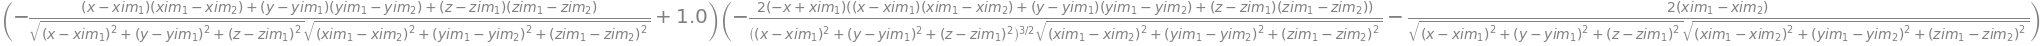

In [18]:
sympy.diff(loss, x)

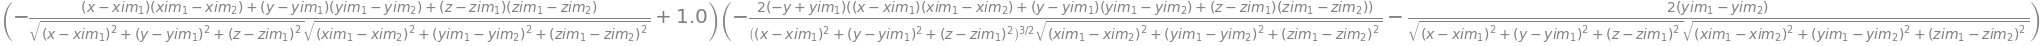

In [19]:
sympy.diff(loss, y)

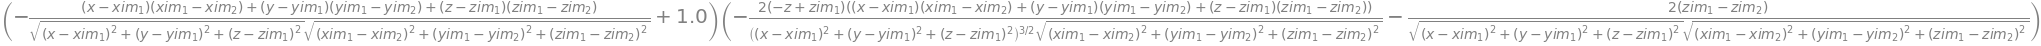

In [20]:
sympy.diff(loss, z)

##### diff 2

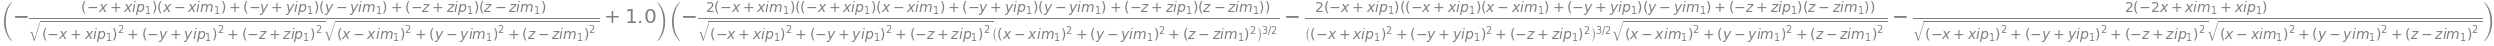

In [30]:
sympy.diff(loss1, x)

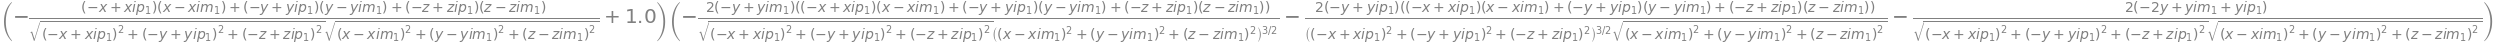

In [31]:
sympy.diff(loss1, y)

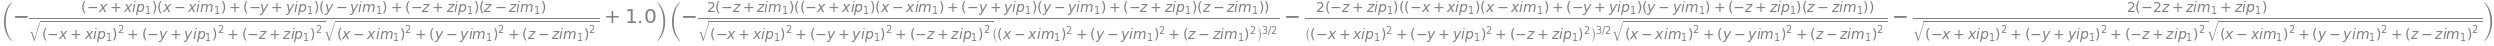

In [32]:
sympy.diff(loss1, z)

##### diff 3

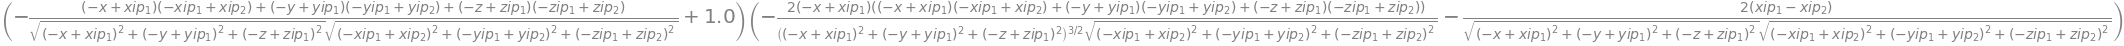

In [33]:
sympy.diff(loss2, x)

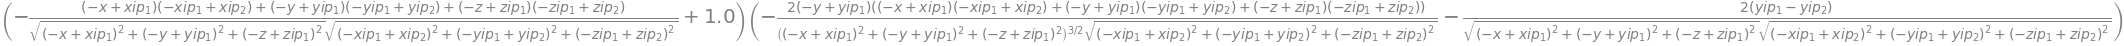

In [34]:
sympy.diff(loss2, y)

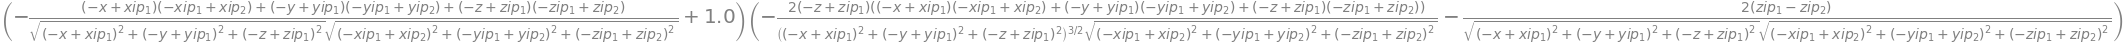

In [35]:
sympy.diff(loss2, z)

In [23]:
def loss_calc(theta0, theta1, theta2):
    loss = np.power(1.0 - np.cos(theta0), 2) + np.power(1.0 - np.cos(theta1), 2) + np.power(1.0 - np.cos(theta2), 2)
    return loss

In [36]:
print(loss_calc(np.pi/4.0, 0.0, np.pi/4.0))
print(loss_calc(0.0, np.pi/2.0, 0.0))
print(loss_calc(10.38 / 180.0 * np.pi, 86.8 / 180.0 * np.pi, 7.125 / 180.0 * np.pi))

0.17157287525380985
0.9999999999999998
0.8918004931539887


##### ------------------   Test

In [20]:
def loss_fun0(xim2, xim1, xi, xip1, xip2):
    vec0 = xim1 - xim2
    vec1 = xi - xim1
    vec2 = xip1 - xi
    vec3 = xip2 - xip1

    cosT0 = vec0.dot(vec1.T) / (np.linalg.norm(vec0, ord=2) * np.linalg.norm(vec1, ord=2))
    loss0 = 1.0 - cosT0

    cosT1 = vec1.dot(vec2.T) / (np.linalg.norm(vec1, ord=2) * np.linalg.norm(vec2, ord=2))
    loss1 = 1.0 - cosT1

    cosT2 = vec2.dot(vec3.T) / (np.linalg.norm(vec2, ord=2) * np.linalg.norm(vec3, ord=2))
    loss2 = 1.0 - cosT2
    loss = loss0 + loss1 + loss2

    print('Loss: %f -> (%f + %f + %f)' % (loss, loss0, loss1, loss2))
    print('Angel: %f + %f + %f' % (
        np.arccos(cosT0) / np.pi * 180.0,
        np.arccos(cosT1) / np.pi * 180.0,
        np.arccos(cosT2) / np.pi * 180.0
    ))


In [7]:
def loss2(theta0, theta1, theta2):
    loss0 = 1.0 - np.cos(theta0)
    loss1 = 1.0 - np.cos(theta1)
    loss2 = 1.0 - np.cos(theta2)
    loss = loss0 + loss1 + loss2

    print('Loss: %f -> (%f + %f + %f)' % (loss, loss0, loss1, loss2))
    print('Angel: %f + %f + %f' % (
        theta0 / np.pi * 180.0,
        theta1 / np.pi * 180.0,
        theta2 / np.pi * 180.0
    ))

In [9]:
loss2(np.deg2rad(0.), np.deg2rad(90.0), np.deg2rad(0.))
loss2(np.deg2rad(30.), np.deg2rad(0.0), np.deg2rad(60.))
loss2(np.deg2rad(45.), np.deg2rad(0.0), np.deg2rad(45.))
loss2(np.deg2rad(30.), np.deg2rad(30.0), np.deg2rad(30.))

Loss: 1.000000 -> (0.000000 + 1.000000 + 0.000000)
Angel: 0.000000 + 90.000000 + 0.000000
Loss: 0.633975 -> (0.133975 + 0.000000 + 0.500000)
Angel: 30.000000 + 0.000000 + 60.000000
Loss: 0.585786 -> (0.292893 + 0.000000 + 0.292893)
Angel: 45.000000 + 0.000000 + 45.000000
Loss: 0.401924 -> (0.133975 + 0.133975 + 0.133975)
Angel: 30.000000 + 30.000000 + 30.000000


In [38]:
xim2, yim2 = symbols('xim2, yim2', is_positive=True, is_real=True)
xim1, yim1 = symbols('xim1, yim1', is_positive=True, is_real=True)
x, y = symbols('x, y', is_positive=True, is_real=True)
xip1, yip1 = symbols('xip1, yip1', is_positive=True, is_real=True)
xip2, yip2 = symbols('xip2, yip2', is_positive=True, is_real=True)

In [39]:
vecx1, vecy1 = xim1 - xim2, yim1 - yim2
vecx2, vecy2 = x - xim1, y - yim1
vecx3, vecy3 = xip1 - x, yip1 - y
vecx4, vecy4 = xip2 - xip1, yip2 - yip1

length1 = sympy.sqrt(sympy.Pow(vecx1, 2) + sympy.Pow(vecy1, 2))
length2 = sympy.sqrt(sympy.Pow(vecx2, 2) + sympy.Pow(vecy2, 2))
length3 = sympy.sqrt(sympy.Pow(vecx3, 2) + sympy.Pow(vecy3, 2))
length4 = sympy.sqrt(sympy.Pow(vecx4, 2) + sympy.Pow(vecy4, 2))

costheta0 = (vecx1 * vecx2 + vecy1 * vecy2) / (length1 * length2)
costheta1 = (vecx2 * vecx3 + vecy2 * vecy3) / (length2 * length3)
costheta2 = (vecx3 * vecx4 + vecy3 * vecy4) / (length3 * length4)

loss = (1.0 - costheta0) + (1.0 - costheta1) + (1.0 - costheta2)

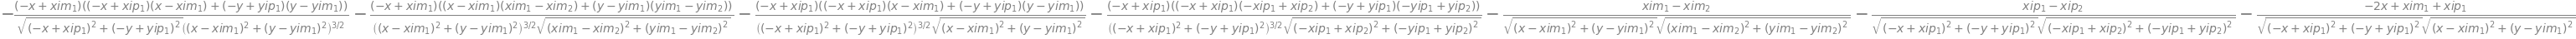

In [41]:
sympy.diff(loss, x)

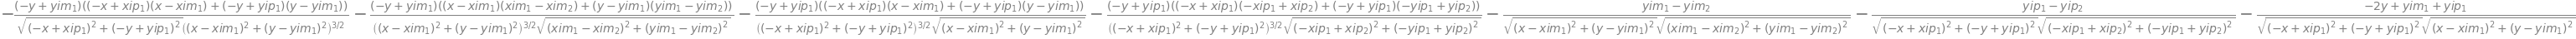

In [42]:
sympy.diff(loss, y)

In [56]:
def gradient(xim2, xim1, xi, xip1, xip2):
    vec0 = xim1 - xim2
    vec1 = xi - xim1
    vec2 = xip1 - xi
    vec3 = xip2 - xip1

    length0 = np.linalg.norm(vec0)
    length1 = np.linalg.norm(vec1)
    length2 = np.linalg.norm(vec2)
    length3 = np.linalg.norm(vec3)

    s1 = vec2.dot(vec1.T)/(length2 * np.power(length1, 3.0))
    s2 = vec1.dot(vec0.T)/(length0 * np.power(length1, 3.0))
    s3 = vec2.dot(vec1.T)/(np.power(length2, 3.0) * length1)
    s4 = vec2.dot(vec3.T)/(np.power(length2, 3.0) * length3)
    s5 = length1 * length0
    s6 = length2 * length3
    s7 = length2 * length1

    grad = -(-vec1) * s1 - (-vec1) * s2 - (-vec2) * s3 - (-vec2) * s4 - (vec0) * s5 - (-vec3) * s6 - (vec2 - vec1) * s7

    return grad

In [48]:
xim2 = np.array([5.0, 5.0])
xim1 = np.array([6.0, 5.0])
xi = np.array([7.0, 5.0])
xip1 = np.array([7.0, 6.0])
xip2 = np.array([7.0, 7.0])

loss_fun0(xim2, xim1, xi, xip1, xip2)

Loss: 1.000000 -> (0.000000 + 1.000000 + 0.000000)
Angel: 0.000000 + 90.000000 + 0.000000


In [58]:
grad = gradient(xim2, xim1, xi, xip1, xip2)
xi_tem = xi - grad * 0.1

print(grad)
print(xi_tem)
loss_fun0(xim2, xim1, xi_tem, xip1, xip2)

[1. 1.]
[6.9 4.9]
Loss: 1.030219 -> (0.006116 + 1.019996 + 0.004107)
Angel: 6.340192 + 91.145763 + 5.194429


In [25]:
xi = xi_tem

### Gradient Mid

In [2]:
def loss_fun0(xim1, xi, xip1):
    vec1 = xi - xim1
    vec2 = xip1 - xi

    cosT1 = vec1.dot(vec2.T) / (np.linalg.norm(vec1, ord=2) * np.linalg.norm(vec2, ord=2))
    loss1 = 1.0 - cosT1
    
    print('Loss: %f' % loss1)
    print('Angel: %f' % (np.arccos(cosT1) / np.pi * 180.0))

In [103]:
xim1, yim1 = symbols('xim1, yim1', is_real=True)
x, y = symbols('x, y', is_real=True)
xip1, yip1 = symbols('xip1, yip1', is_real=True)

vecx2, vecy2 = x - xim1, y - yim1
vecx3, vecy3 = xip1 - x, yip1 - y

length2 = sympy.sqrt(sympy.Pow(vecx2, 2) + sympy.Pow(vecy2, 2))
length3 = sympy.sqrt(sympy.Pow(vecx3, 2) + sympy.Pow(vecy3, 2))

costheta1 = (vecx2 * vecx3 + vecy2 * vecy3) / (length2 * length3)

loss = 1.0 - costheta1

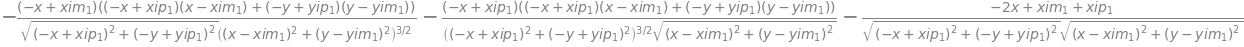

In [104]:
sympy.diff(loss, x)

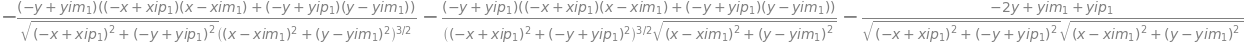

In [105]:
sympy.diff(loss, y)

In [3]:
def gradient0(xim1, xi, xip1):
    vec1 = xi - xim1
    vec2 = xip1 - xi

    length1 = np.linalg.norm(vec1)
    length2 = np.linalg.norm(vec2)

    s1 = vec2.dot(vec1.T)/(length2 * np.power(length1, 3.0))
    s3 = vec2.dot(vec1.T)/(np.power(length2, 3.0) * length1)
    s7 = length2 * length1

    grad = -(-vec1) * s1 - (-vec2) * s3 - (vec2 - vec1) * s7

    return grad

In [15]:
xim2 = np.array([0.0, 0.0])
xim1 = np.array([1.0, 0.0])

xi = np.array([1.2, 0.1])
# xi = np.array([2.0, 0.0])

xip1 = np.array([2.0, 1.0])
xip2 = np.array([2.0, 2.0])

loss_fun0(xim1, xi, xip1)

Loss: 0.071523
Angel: 21.801409


In [16]:
grad = gradient0(xim1, xi, xip1)
xi_tem = xi - grad * 0.01

print(-grad)
print(xi_tem)
loss_fun0(xim1, xi_tem, xip1)

[-4.06461482 -2.21784267]
[1.15935385 0.07782157]
Loss: 0.070347
Angel: 21.619201


In [13]:
xi = xi_tem

### Gradient First

In [2]:
def loss_fun1(xim2, xim1, xi):
    vec0 = xim1 - xim2
    vec1 = xi - xim1

    cosT0 = vec0.dot(vec1.T) / (np.linalg.norm(vec0, ord=2) * np.linalg.norm(vec1, ord=2))
    loss0 = 1.0 - cosT0

    print('Loss: %f' % (loss0))
    print('Angel: %f' % (
        np.arccos(cosT0) / np.pi * 180.0
    ))

In [3]:
xim2, yim2 = symbols('xim2, yim2', is_positive=True, is_real=True)
xim1, yim1 = symbols('xim1, yim1', is_positive=True, is_real=True)
x, y = symbols('x, y', is_positive=True, is_real=True)

vecx1, vecy1 = xim1 - xim2, yim1 - yim2
vecx2, vecy2 = x - xim1, y - yim1

length1 = sympy.sqrt(sympy.Pow(vecx1, 2) + sympy.Pow(vecy1, 2))
length2 = sympy.sqrt(sympy.Pow(vecx2, 2) + sympy.Pow(vecy2, 2))

costheta0 = (vecx1 * vecx2 + vecy1 * vecy2) / (length1 * length2)

loss = 1.0 - costheta0

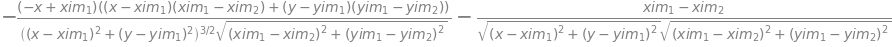

In [4]:
sympy.diff(loss, x)

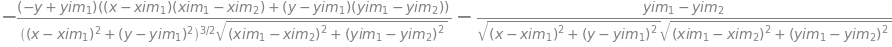

In [5]:
sympy.diff(loss, y)

In [126]:
def gradient1(xim2, xim1, xi):
    vec0 = xim1 - xim2
    vec1 = xi - xim1

    length0 = np.linalg.norm(vec0)
    length1 = np.linalg.norm(vec1)

    s1 = vec1.dot(vec0.T)/(length0 * np.power(length1, 3.0))
    s2 = length0 * length1
    
    grad = -(-vec1) * s1 - (vec0) * s2

    return grad

In [150]:
xim2 = np.array([0.0, 0.0])
xim1 = np.array([1.0, 0.0])

xi = np.array([1.2, 0.1])
# xi = np.array([1.0, 1.0])

xip1 = np.array([2.0, 1.0])
xip2 = np.array([2.0, 2.0])

loss_fun1(xim2, xim1, xi)

Loss: 0.105573
Angel: 26.565051


In [151]:
grad = gradient1(xim2, xim1, xi)
xi_tem = xi - grad * 0.01

print(grad)
print(xi_tem)
loss_fun1(xim2, xim1, xi_tem)

[3.35410197 1.78885438]
[1.16645898 0.08211146]
Loss: 0.103176
Angel: 26.256360


In [148]:
xi = xi_tem

### Gradient Last

In [119]:
def loss_fun2(xi, xip1, xip2):
    vec2 = xip1 - xi
    vec3 = xip2 - xip1

    cosT2 = vec2.dot(vec3.T) / (np.linalg.norm(vec2, ord=2) * np.linalg.norm(vec3, ord=2))
    loss2 = 1.0 - cosT2

    print('Loss: %f' % (loss2))
    print('Angel: %f' % (np.arccos(cosT2) / np.pi * 180.0))

In [4]:
x, y = symbols('x, y', is_positive=True, is_real=True)
xip1, yip1 = symbols('xip1, yip1', is_positive=True, is_real=True)
xip2, yip2 = symbols('xip2, yip2', is_positive=True, is_real=True)

vecx3, vecy3 = xip1 - x, yip1 - y
vecx4, vecy4 = xip2 - xip1, yip2 - yip1

length3 = sympy.sqrt(sympy.Pow(vecx3, 2) + sympy.Pow(vecy3, 2))
length4 = sympy.sqrt(sympy.Pow(vecx4, 2) + sympy.Pow(vecy4, 2))

costheta2 = (vecx3 * vecx4 + vecy3 * vecy4) / (length3 * length4)

loss = 1.0 - costheta2

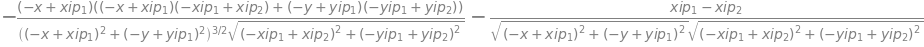

In [5]:
sympy.diff(loss, x)

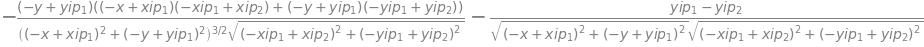

In [6]:
sympy.diff(loss, y)

In [120]:
def gradient2(xi, xip1, xip2):
    vec2 = xip1 - xi
    vec3 = xip2 - xip1

    length2 = np.linalg.norm(vec2)
    length3 = np.linalg.norm(vec3)

    s4 = vec2.dot(vec3.T)/(np.power(length2, 3.0) * length3)
    s6 = length2 * length3

    grad = -(vec2) * s4 - (-vec3) * s6

    return grad

In [121]:
xim2 = np.array([0.0, 0.0])
xim1 = np.array([1.0, 0.0])

xi = np.array([1.2, 0.1])
# xi = np.array([1.0, 0.0])

xip1 = np.array([2.0, 1.0])
xip2 = np.array([2.0, 2.0])

loss_fun2(xi, xip1, xip2)

Loss: 0.252591
Angel: 41.633539


In [122]:
grad = gradient2(xi, xip1, xip2)
xi_tem = xi - grad * 0.1

print(grad)
print(xi_tem)
loss_fun2(xi_tem, xip1, xip2)

[-0.41236376  0.74025023]
[1.24123638 0.02597498]
Loss: 0.211115
Angel: 37.918522


### Gradient all

In [106]:
def loss_fun(xim2, xim1, xi, xip1, xip2):
    vec0 = xim1 - xim2
    vec1 = xi - xim1
    vec2 = xip1 - xi
    vec3 = xip2 - xip1

    cosT0 = vec0.dot(vec1.T) / (np.linalg.norm(vec0, ord=2) * np.linalg.norm(vec1, ord=2))
    loss0 = 1.0 - cosT0

    cosT1 = vec1.dot(vec2.T) / (np.linalg.norm(vec1, ord=2) * np.linalg.norm(vec2, ord=2))
    loss1 = 1.0 - cosT1

    cosT2 = vec2.dot(vec3.T) / (np.linalg.norm(vec2, ord=2) * np.linalg.norm(vec3, ord=2))
    loss2 = 1.0 - cosT2
    loss = loss0 + loss1 + loss2

    print('Loss: %f -> (%f + %f + %f)' % (loss, loss0, loss1, loss2))
    print('Angel: %f + %f + %f' % (
        np.arccos(cosT0) / np.pi * 180.0,
        np.arccos(cosT1) / np.pi * 180.0,
        np.arccos(cosT2) / np.pi * 180.0
    ))

In [107]:
def gradient_mid(xim1, xi, xip1):
    vec1 = xi - xim1
    vec2 = xip1 - xi

    length1 = np.linalg.norm(vec1)
    length2 = np.linalg.norm(vec2)

    s1 = vec2.dot(vec1.T)/(length2 * np.power(length1, 3.0))
    s3 = vec2.dot(vec1.T)/(np.power(length2, 3.0) * length1)
    s7 = length2 * length1

    grad = -(-vec1) * s1 - (-vec2) * s3 - (vec2 - vec1) * s7

    return grad

def gradient_first(xim2, xim1, xi):
    vec0 = xim1 - xim2
    vec1 = xi - xim1

    length0 = np.linalg.norm(vec0)
    length1 = np.linalg.norm(vec1)

    s1 = vec1.dot(vec0.T)/(length0 * np.power(length1, 3.0))
    s2 = length0 * length1
    
    grad = -(-vec1) * s1 - (vec0) * s2

    return grad

def gradient_last(xi, xip1, xip2):
    vec2 = xip1 - xi
    vec3 = xip2 - xip1

    length2 = np.linalg.norm(vec2)
    length3 = np.linalg.norm(vec3)

    s4 = vec2.dot(vec3.T)/(np.power(length2, 3.0) * length3)
    s6 = length2 * length3

    grad = -(vec2) * s4 - (-vec3) * s6

    return grad

In [115]:
xim2 = np.array([0.0, 0.0])
xim1 = np.array([1.0, 0.0])
xi = np.array([1.2, 0.1])
xip1 = np.array([2.0, 1.0])
xip2 = np.array([2.0, 2.0])

loss_fun(xim2, xim1, xi, xip1, xip2)

Loss: 0.429687 -> (0.105573 + 0.071523 + 0.252591)
Angel: 26.565051 + 21.801409 + 41.633539


In [109]:
grad_first = gradient_first(xim2, xim1, xi)
grad_mid = gradient_mid(xim1, xi, xip1)
grad_last = gradient_last(xi, xip1, xip2)

print('grad first:', grad_first)
print('grad mid:', grad_mid)
print('grad last:', grad_last)

grad_all = grad_first + grad_mid + grad_last
xi_tem = xi - grad_all / np.linalg.norm(grad_all, ord=2) * 0.1

print('grad: ', grad_all)
print(xi_tem)
print('asf')
loss_fun(xim2, xim1, xi_tem, xip1, xip2)

grad first: [3.35410197 1.78885438]
grad mid: [4.06461482 2.21784267]
grad last: [-0.41236376  0.74025023]
grad:  [7.00635303 4.74694727]
[11.11721202 10.04390945]
asf
Loss: 0.435832 -> (0.063553 + 0.106990 + 0.265290)
Angel: 20.536734 + 26.746019 + 42.717247


In [18]:
xim2 = np.array([0., 0., 0.])
xim1 = np.array([1., 0., 0.])
xi = np.array([1.38, 0.186, 0.0])
xip1 = np.array([2., 1., 0.])
xip2 = np.array([2., 2., 0.])

### All loss check

In [8]:
import matplotlib.pyplot as plt

In [72]:
def cur_loss_fun(xim2, xim1, xi, xip1, xip2, debug=False):
    vec0 = xim1 - xim2
    vec1 = xi - xim1
    vec2 = xip1 - xi
    vec3 = xip2 - xip1

    cosT0 = vec0.dot(vec1.T) / (np.linalg.norm(vec0, ord=2) * np.linalg.norm(vec1, ord=2))
    loss0 = 1.0 - cosT0

    cosT1 = vec1.dot(vec2.T) / (np.linalg.norm(vec1, ord=2) * np.linalg.norm(vec2, ord=2))
    loss1 = 1.0 - cosT1

    cosT2 = vec2.dot(vec3.T) / (np.linalg.norm(vec2, ord=2) * np.linalg.norm(vec3, ord=2))
    loss2 = 1.0 - cosT2
    loss = loss0 + loss1 + loss2

    if debug:
        print('Loss: %f -> (%f + %f + %f)' % (loss, loss0, loss1, loss2))
        print('Angel: %f + %f + %f' % (
            np.arccos(cosT0) / np.pi * 180.0,
            np.arccos(cosT1) / np.pi * 180.0,
            np.arccos(cosT2) / np.pi * 180.0
        ))

    return loss

def smooth_loss_fun(xim1, xi, xip1):
    loss = (np.power(xi - xim1, 2)).sum() + (np.power(xip1 - xi, 2)).sum()
    return loss

In [110]:
xim2 = np.array([0.0, 0.0])
xim1 = np.array([1.0, 0.0])
xip1 = np.array([2.0, 1.0])
xip2 = np.array([2.0, 2.0])

xi_Xrange = np.arange(0.0, 2.0, 0.1)
xi_Yrange = np.arange(0.0, 2.0, 0.1)
xs, ys = np.meshgrid(xi_Xrange, xi_Yrange)
xys_map = np.concatenate([xs[..., np.newaxis], ys[..., np.newaxis]], axis=-1)

res = []
# heat = np.zeros(xys_map.shape[:2])
for i in range(xys_map.shape[0]):
    for j in range(xys_map.shape[1]):
        xi = xys_map[i][j]

        smooth_loss = smooth_loss_fun(xim1, xi, xip1)
        cur_loss = cur_loss_fun(xim2, xim1, xi, xip1, xip2)

        # print(xi, smooth_loss, cur_loss)

        loss = smooth_loss + cur_loss
        # loss = smooth_loss
        # loss = cur_loss

        res.append([xi[0], xi[1], loss])

res = np.array(res)

/home/quan/.conda/envs/torch-env/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/home/quan/.conda/envs/torch-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [111]:
res = res[~np.isnan(res[:, 2])]

In [112]:
idx = np.argmin(res[:, 2])
res[idx]

array([1.6       , 0.4       , 1.45282249])

In [113]:
cur_loss_fun(xim2, xim1, np.array([1.6, 0.3]), xip1, xip2, True)

Loss: 0.405279 -> (0.105573 + 0.167950 + 0.131757)
Angel: 26.565051 + 33.690068 + 29.744881


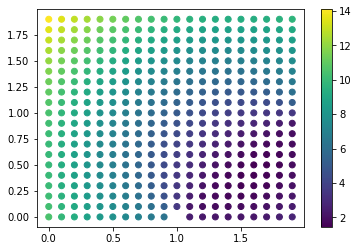

In [114]:
scatter = plt.scatter(
    x = res[:, 0], 
    y = res[:, 1],
    c = res[:, 2]
)
plt.colorbar(scatter)

In [58]:
xi = np.array([1.4797, 0.214997])

smooth_loss = smooth_loss_fun(xim1, xi, xip1)
cur_loss = cur_loss_fun(xim2, xim1, xi, xip1, xip2)
loss = smooth_loss + cur_loss
print(smooth_loss, cur_loss, loss)

1.163277600018 0.4088712203228402 1.5721488203408402


### other test

#### grdient mid

In [2]:
def loss_fun0(xim1, xi, xip1):
    vec1 = xi - xim1
    vec2 = xip1 - xi

    cosT1 = vec1.dot(vec2.T) / (np.linalg.norm(vec1, ord=2) * np.linalg.norm(vec2, ord=2))
    loss1 = 1.0 - cosT1
    
    print('Loss: %f' % loss1)
    print('Angel: %f' % (np.arccos(cosT1) / np.pi * 180.0))

In [3]:
xim1, yim1 = symbols('xim1, yim1', is_real=True)
x, y = symbols('x, y', is_real=True)
xip1, yip1 = symbols('xip1, yip1', is_real=True)

vecx2, vecy2 = x - xim1, y - yim1
vecx3, vecy3 = xip1 - x, yip1 - y

costheta1 = (vecx2 * vecx3 + vecy2 * vecy3)

loss = 1.0 - costheta1

In [4]:
print(sympy.diff(loss, x))
print(sympy.diff(loss, y))

2*x - xim1 - xip1
2*y - yim1 - yip1


In [22]:
def gradient0(xim1, xi, xip1):
    vec1 = xi - xim1
    vec2 = xip1 - xi
    grad = vec1 - vec2
    return grad

In [99]:
xim2 = np.array([0.0, 0.0])
xim1 = np.array([1.0, 0.0])

xi = np.array([1.2, 0.1])
# xi = np.array([2.0, 0.0])

xip1 = np.array([2.0, 1.0])
xip2 = np.array([2.0, 2.0])

loss_fun0(xim1, xi, xip1)

Loss: 0.071523
Angel: 21.801409


In [101]:
grad = gradient0(xim1, xi, xip1)
xi_tem = xi - grad * 0.01

print(grad)
print(xi_tem)
loss_fun0(xim1, xi_tem, xip1)

[-0.6 -0.8]
[1.206 0.108]
Loss: 0.064309
Angel: 20.659859


In [39]:
xi = xi_tem

#### gradient first

In [103]:
def loss_fun1(xim2, xim1, xi):
    vec0 = xim1 - xim2
    vec1 = xi - xim1

    cosT0 = vec0.dot(vec1.T) / (np.linalg.norm(vec0, ord=2) * np.linalg.norm(vec1, ord=2))
    loss0 = 1.0 - cosT0

    print('Loss: %f' % (loss0))
    print('Angel: %f' % (
        np.arccos(cosT0) / np.pi * 180.0
    ))

In [12]:
xim2, yim2 = symbols('xim2, yim2', is_positive=True, is_real=True)
xim1, yim1 = symbols('xim1, yim1', is_positive=True, is_real=True)
x, y = symbols('x, y', is_positive=True, is_real=True)

vecx1, vecy1 = xim1 - xim2, yim1 - yim2
vecx2, vecy2 = x - xim1, y - yim1

costheta0 = (vecx1 * vecx2 + vecy1 * vecy2)

loss = 1.0 - costheta0

In [13]:
print(sympy.diff(loss, x))
print(sympy.diff(loss, y))

-xim1 + xim2
-yim1 + yim2


In [102]:
def gradient1(xim2, xim1, xi):
    vec0 = xim1 - xim2
    grad = -vec0
    return grad

In [104]:
xim2 = np.array([0.0, 0.0])
xim1 = np.array([1.0, 0.0])

xi = np.array([1.2, 0.1])
# xi = np.array([2.0, 1.0])

xip1 = np.array([2.0, 1.0])
xip2 = np.array([2.0, 2.0])

loss_fun1(xim2, xim1, xi)

Loss: 0.105573
Angel: 26.565051


In [105]:
grad = gradient1(xim2, xim1, xi)
xi_tem = xi - grad * 0.1

print(grad)
print(xi_tem)
loss_fun1(xim2, xim1, xi_tem)

[-1. -0.]
[1.3 0.1]
Loss: 0.051317
Angel: 18.434949


In [64]:
xi = xi_tem

#### gradient last

In [106]:
def loss_fun2(xi, xip1, xip2):
    vec2 = xip1 - xi
    vec3 = xip2 - xip1

    cosT2 = vec2.dot(vec3.T) / (np.linalg.norm(vec2, ord=2) * np.linalg.norm(vec3, ord=2))
    loss2 = 1.0 - cosT2

    print('Loss: %f' % (loss2))
    print('Angel: %f' % (np.arccos(cosT2) / np.pi * 180.0))

In [18]:
x, y = symbols('x, y', is_positive=True, is_real=True)
xip1, yip1 = symbols('xip1, yip1', is_positive=True, is_real=True)
xip2, yip2 = symbols('xip2, yip2', is_positive=True, is_real=True)

vecx3, vecy3 = xip1 - x, yip1 - y
vecx4, vecy4 = xip2 - xip1, yip2 - yip1

costheta2 = (vecx3 * vecx4 + vecy3 * vecy4)

loss = 1.0 - costheta2

In [19]:
print(sympy.diff(loss, x))
print(sympy.diff(loss, y))

-xip1 + xip2
-yip1 + yip2


In [107]:
def gradient2(xi, xip1, xip2):
    vec3 = xip2 - xip1
    grad = vec3
    return grad

In [108]:
xim2 = np.array([0.0, 0.0])
xim1 = np.array([1.0, 0.0])

xi = np.array([1.2, 0.1])
# xi = np.array([1.0, 0.0])

xip1 = np.array([2.0, 1.0])
xip2 = np.array([2.0, 2.0])

loss_fun2(xi, xip1, xip2)

Loss: 0.252591
Angel: 41.633539


In [118]:
grad = gradient2(xi, xip1, xip2)
xi_tem = xi - grad * 0.1

print(grad)
print(xi_tem)
loss_fun2(xi_tem, xip1, xip2)

[0. 1.]
[ 1.29922779 -0.31240347]
Loss: 0.117877
Angel: 28.100476


In [117]:
xi = xi_tem

#### test all

In [87]:
def loss_fun(xim2, xim1, xi, xip1, xip2):
    vec0 = xim1 - xim2
    vec1 = xi - xim1
    vec2 = xip1 - xi
    vec3 = xip2 - xip1

    cosT0 = vec0.dot(vec1.T) / (np.linalg.norm(vec0, ord=2) * np.linalg.norm(vec1, ord=2))
    loss0 = 1.0 - cosT0

    cosT1 = vec1.dot(vec2.T) / (np.linalg.norm(vec1, ord=2) * np.linalg.norm(vec2, ord=2))
    loss1 = 1.0 - cosT1

    cosT2 = vec2.dot(vec3.T) / (np.linalg.norm(vec2, ord=2) * np.linalg.norm(vec3, ord=2))
    loss2 = 1.0 - cosT2
    loss = loss0 + loss1 + loss2

    print('Loss: %f -> (%f + %f + %f)' % (loss, loss0, loss1, loss2))
    print('Angel: %f + %f + %f' % (
        np.arccos(cosT0) / np.pi * 180.0,
        np.arccos(cosT1) / np.pi * 180.0,
        np.arccos(cosT2) / np.pi * 180.0
    ))

def gradient_mid(xim1, xi, xip1):
    vec1 = xi - xim1
    vec2 = xip1 - xi
    grad = vec1 - vec2
    return grad

def gradient_first(xim2, xim1, xi):
    vec0 = xim1 - xim2
    grad = -vec0
    return grad

def gradient_last(xi, xip1, xip2):
    vec3 = xip2 - xip1
    grad = vec3
    return grad

In [95]:
xim2 = np.array([0.0, 0.0])
xim1 = np.array([1.0, 0.0])
xi = np.array([1.2, 0.1])
xip1 = np.array([2.0, 1.0])
xip2 = np.array([2.0, 2.0])

loss_fun(xim2, xim1, xi, xip1, xip2)

Loss: 0.429687 -> (0.105573 + 0.071523 + 0.252591)
Angel: 26.565051 + 21.801409 + 41.633539


In [110]:
grad_first = gradient_first(xim2, xim1, xi)
grad_mid = gradient_mid(xim1, xi, xip1)
grad_last = gradient_last(xi, xip1, xip2)

print('grad first:', grad_first)
print('grad mid:', grad_mid)
print('grad last:', grad_last)

grad_all = grad_first + grad_mid + grad_last
xi_tem = xi - grad_all / np.linalg.norm(grad_all, ord=2) * 0.1

print('grad: ', grad_all)
print(xi_tem)
loss_fun(xim2, xim1, xi_tem, xip1, xip2)

grad first: [-1. -0.]
grad mid: [-0.6 -0.8]
grad last: [0. 1.]
grad:  [-1.6  0.2]
[1.29922779 0.08759653]
Loss: 0.439798 -> (0.040278 + 0.192596 + 0.206924)
Angel: 16.316967 + 36.156939 + 37.526093


### tttttt

In [3]:
def loss_fun0(xim1, xi, xip1):
    vec1 = xi - xim1
    vec2 = xip1 - xi

    cosT1 = vec1.dot(vec2.T) / (np.linalg.norm(vec1, ord=2) * np.linalg.norm(vec2, ord=2))
    theta = np.arccos(cosT1)
    curvature = theta / np.linalg.norm(vec2, ord=2)

    loss1 = curvature
    
    print('Loss curvature: %f' % loss1)

In [157]:
xim1, yim1 = symbols('xim1, yim1', is_real=True)
x, y = symbols('x, y', is_real=True)
xip1, yip1 = symbols('xip1, yip1', is_real=True)

vecx2, vecy2 = x - xim1, y - yim1
vecx3, vecy3 = xip1 - x, yip1 - y

length2 = sympy.sqrt(sympy.Pow(vecx2, 2) + sympy.Pow(vecy2, 2))
length3 = sympy.sqrt(sympy.Pow(vecx3, 2) + sympy.Pow(vecy3, 2))

costheta1 = (vecx2 * vecx3 + vecy2 * vecy3) / (length2 * length3)
theta = sympy.acos(costheta1)
curvature = theta / length3

loss = curvature

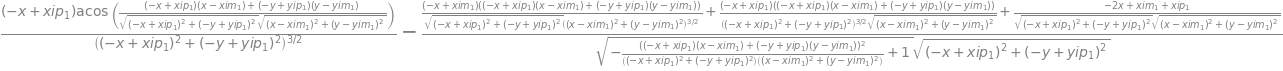

In [158]:
sympy.diff(loss, x)

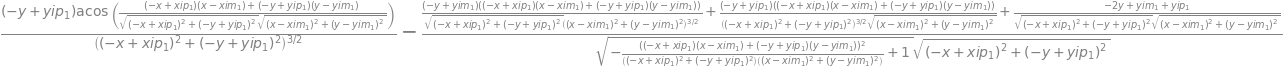

In [159]:
sympy.diff(loss, y)

In [7]:
def gradient0(xim1, xi, xip1):
    vec1 = xi - xim1
    vec2 = xip1 - xi

    length1 = np.linalg.norm(vec1)
    length2 = np.linalg.norm(vec2)

    s1 = np.arccos(vec1.dot(vec2.T) / (length1 * length2))
    s2 = np.power(length2, 3.0)
    s3 = vec1.dot(vec2.T) / (length2 * np.power(length1, 3.0))
    s4 = vec1.dot(vec2.T) / (length1 * np.power(length2, 3.))
    s5 = length1 * length2
    s6 = np.sqrt(1.0 - np.power(vec1.dot(vec2.T), 2.0) / (np.power(length1, 2.0) * np.power(length2, 2.0)))
    
    grad = vec2 * s1 / s2 - (vec1 * s3 + vec2 * s4 + (vec2 - vec1) / s5) / (s6 * length2)

    return grad

In [49]:
xim2 = np.array([0.0, 0.0])
xim1 = np.array([1.0, 0.0])

xi = np.array([1.2, 0.1])
# xi = np.array([2.0, 0.0])

xip1 = np.array([2.0, 1.0])
xip2 = np.array([2.0, 2.0])

loss_fun0(xim1, xi, xip1)

Loss curvature: 0.315993


In [52]:
grad = gradient0(xim1, xi, xip1)
xi_tem = xi - grad / np.linalg.norm(grad) * 0.1

print(grad)
print(xi_tem)
loss_fun0(xim1, xi_tem, xip1)

[-12.24546296 -11.33007594]
[1.35020602 0.23195282]
Loss curvature: 0.281909


In [51]:
xi = xi_tem